# Clustering

# 1. Metrics

In this lab, you will use and interpret clustering metrics on the [Iris dataset](https://fr.wikipedia.org/wiki/Iris_de_Fisher). Feel free to use any dataset of your choice.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix

## Data

In [4]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target
feature_names = iris.feature_names
label_names = iris.target_names

In [5]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(label_names)

['setosa' 'versicolor' 'virginica']


In [7]:
def show_data(X, y, features=[0, 1], feature_names=feature_names):
    '''Display the samples in 2D'''
    plt.figure(figsize=(5,5))
    for label in set(y):
        plt.scatter(X[y == label, features[0]], X[y == label, features[1]])
    plt.xlabel(feature_names[features[0]])
    plt.ylabel(feature_names[features[1]])
    plt.show()

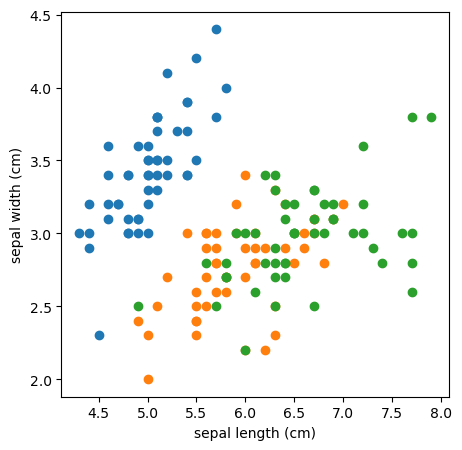

In [8]:
show_data(X, y, [0, 1])

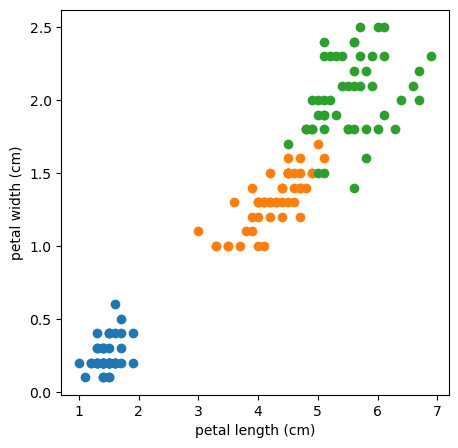

In [9]:
show_data(X, y, [2, 3])

## K-means

Let's apply k-means and display the clusters.

In [10]:
km = KMeans(n_clusters=3, n_init=10)
labels = km.fit_predict(X)

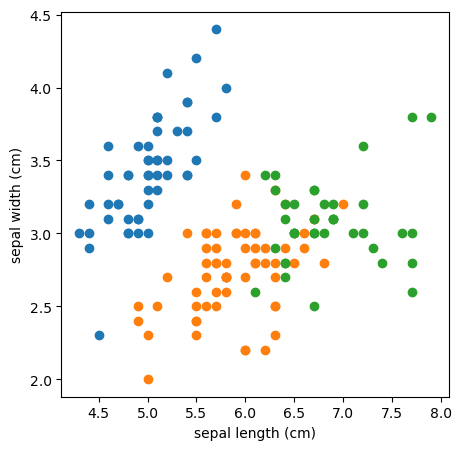

In [11]:
show_data(X, labels, [0, 1])

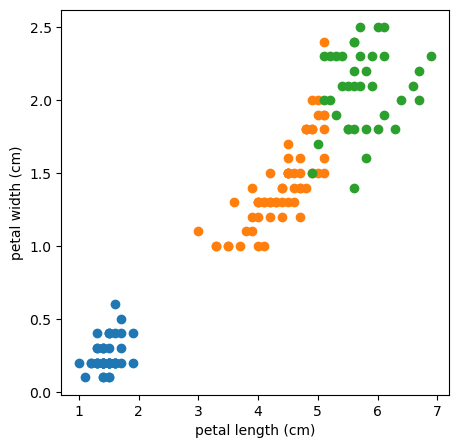

In [12]:
show_data(X, labels, [2, 3])

## Silhouette

We first try to assess the quality of the clustering using the silhouette score. Here we do not use the ground-truth labels.

## To do

* Compute the silhouette of each sample.
* What are the 3 samples of lowest silhouette? What are their clusters?
* Display the silhouette distribution of each cluster using Seaborn (check ``sns.kdeplot``).
* What are the worst clusters in terms of silhouette?
* Compute the average silhouette when the number of clusters grows from 2 to 6.<br> 
What is the optimal number of clusters in terms of average silhouette?

In [16]:
# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X, labels)

# What are the 3 samples of lowest silhouette? What are their clusters?

# Find the indices of the three samples with the lowest silhouette scores
worst_samples_indices = np.argsort(silhouette_vals)[:3]

# The clusters of the three samples with the lowest silhouette scores
worst_samples_clusters = labels[worst_samples_indices]

# The silhouette scores of the three samples with the lowest silhouette scores
worst_samples_scores = silhouette_vals[worst_samples_indices]

worst_samples_indices, worst_samples_clusters, worst_samples_scores

(array([114,  50, 134]),
 array([2, 2, 0], dtype=int32),
 array([0.02635881, 0.02672203, 0.05328614]))

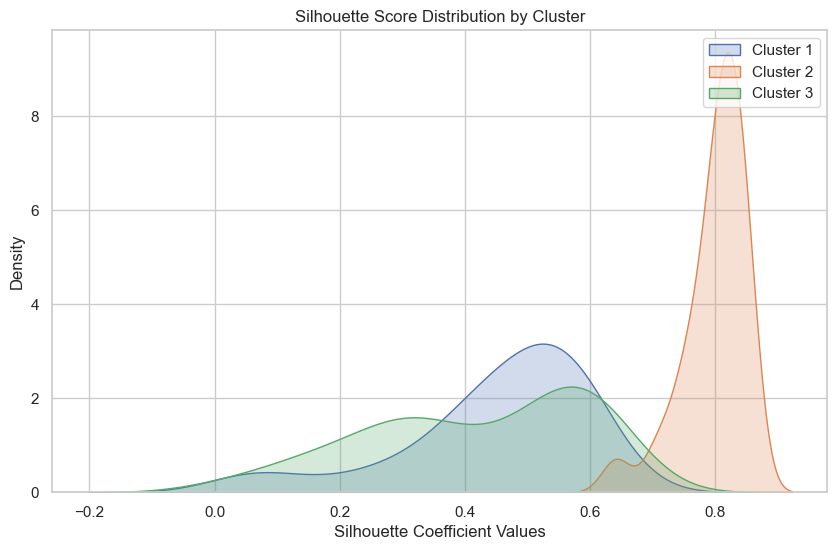

In [20]:
# Display the silhouette distribution of each cluster using Seaborn (check ``sns.kdeplot``).

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting the silhouette distribution for each cluster
plt.figure(figsize=(10, 6))
for i in range(km.n_clusters):
    sns.kdeplot(silhouette_vals[labels == i], fill=True, label=f'Cluster {i + 1}')

plt.title('Silhouette Score Distribution by Cluster')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Density')
plt.legend()
plt.show()

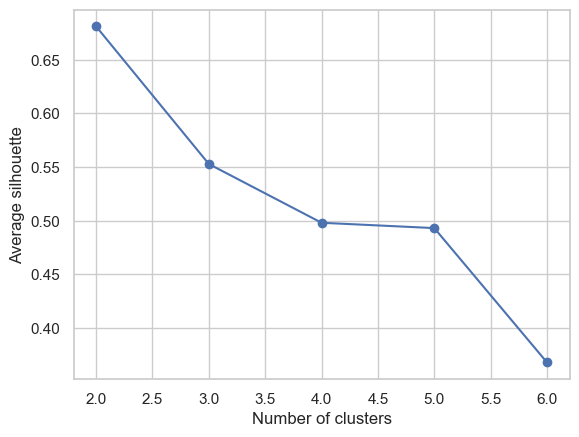

In [21]:
# What are the worst clusters in terms of silhouette ?
# The worst clusters in terms of silhouette is the number 3.

# Compute the average silhouette when the number of clusters grows from 2 to 6
silhouette_avgs = []
for n_clusters in range(2, 7):
    km = KMeans(n_clusters=n_clusters, n_init=10)
    labels = km.fit_predict(X)
    silhouette_avgs.append(silhouette_score(X, labels))

# Plot the average silhouette as a function of the number of clusters
plt.plot(range(2, 7), silhouette_avgs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average silhouette')
plt.show()

In [22]:
# What is the optimal number of clusters in terms of average silhouette?
# The optimal number of clusters in terms of average silhouette is 2.

## Contingency matrix

We now use the ground-truth labels. First, we compute and display the contingency matrix.

In [13]:
n_clusters = 3
km = KMeans(n_clusters, n_init=10)
labels = km.fit_predict(X)

In [14]:
contingency = contingency_matrix(y, labels)

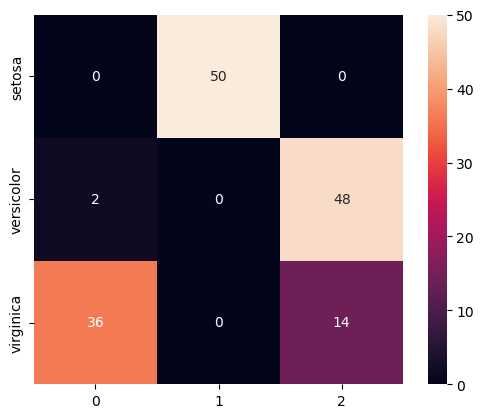

In [15]:
sns.heatmap(contingency, annot=True, square=True, xticklabels=np.arange(n_clusters), yticklabels=label_names);

## Metrics

Second, we use the metrics (Average F1 score, ARI and AMI) to find the optimal number of clusters.

## To do

* Plot the ARI and AMI scores with respect to the number of clusters.
* What is the optimal number of clusters?

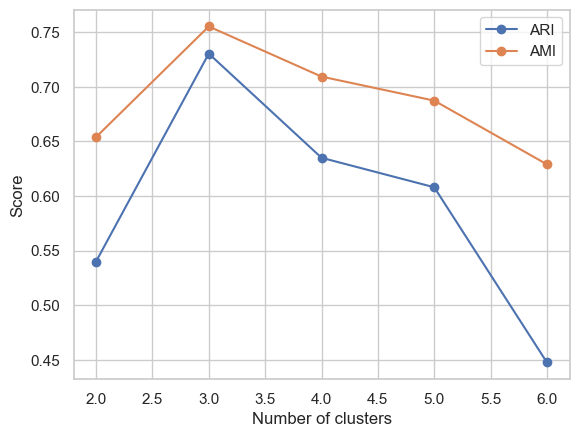

In [23]:
# Plot the ARI and AMI scores with respect to the number of clusters.
n_clusters = range(2, 7)
ari_scores = []
ami_scores = []
for n in n_clusters:
    km = KMeans(n, n_init=10)
    labels = km.fit_predict(X)
    ari_scores.append(adjusted_rand_score(y, labels))
    ami_scores.append(adjusted_mutual_info_score(y, labels))

plt.plot(n_clusters, ari_scores, marker='o', label='ARI')
plt.plot(n_clusters, ami_scores, marker='o', label='AMI')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
# What is the optimal number of clusters in terms of ARI and AMI?
# The optimal number of clusters in terms of ARI and AMI is 3.